In [51]:
import seaborn as sns  
import pandas as pd  
import matplotlib.pyplot as plt 

#read the data 
df1 = pd.read_csv('steps.csv',sep = ';') 
df2 = pd.read_csv('survey.csv')

In [52]:
#combine dataframes
df = pd.merge(df2, df1, on = 'id') #'id' is the common identifier
df.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
# clean data by remove the unreasonable weight value,
# The apply method of a dataframe lets us apply a function to all the elements.

df['weight'] = df['weight'].apply(pd.to_numeric, errors='coerce')

# create a function that we then apply to the entire column
def check_weight(x):
    if(x > 200 or x < 30): 
        return float('NaN')
    else: 
        return x
df['weight'] = df['weight'].apply(check_weight)

print(df)

      id         city  gender    age  hh_size  education          education_1  \
0      1     Bordeaux    Male  25-34        4          4  Master or doctorate   
1      2        Lille    Male  35-44        1          3             Bachelor   
2      3  Montpellier    Male  25-34        2          2  Master or doctorate   
3      4         Lyon    Male    <25        1          1             Bachelor   
4      5  Montpellier  Female  25-34        3          4             Bachelor   
..   ...          ...     ...    ...      ...        ...                  ...   
924  925        Lille  Female  45-54        3          4  Master or doctorate   
925  926        Lille    Male    <25        3          5             Bachelor   
926  927  Montpellier    Male  35-44        2          2             Bachelor   
927  928        Lille  Female  55-64        1          1          High school   
928  929         Lyon    Male  25-34        2          2          High school   

     height  weight  20-6-2

In [54]:
#Create the variable mean steps per participant.
mean_steps = df.loc[:,"20-6-2013":"13-5-2014"].mean(axis=1) #get the mean over the row (all the participants) and store
mean_steps.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            919, 920, 921, 922, 923, 924, 925, 926, 927, 928],
           dtype='int64', length=929)

In [55]:
#add mean_steps to dataframe 
df.loc[:,'mean_steps'] = mean_steps
df.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,mean_steps
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10205.521212
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5687.423313
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN,8301.729730
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3633.200000
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5312.129630


In [56]:
#clean data
#the mean steps over 200000 are not reasonable, also remove it
df.drop(df.loc[df['mean_steps']==201722.600000].index, inplace=True)
df_new = df.dropna(subset=['height', 'weight','mean_steps'])

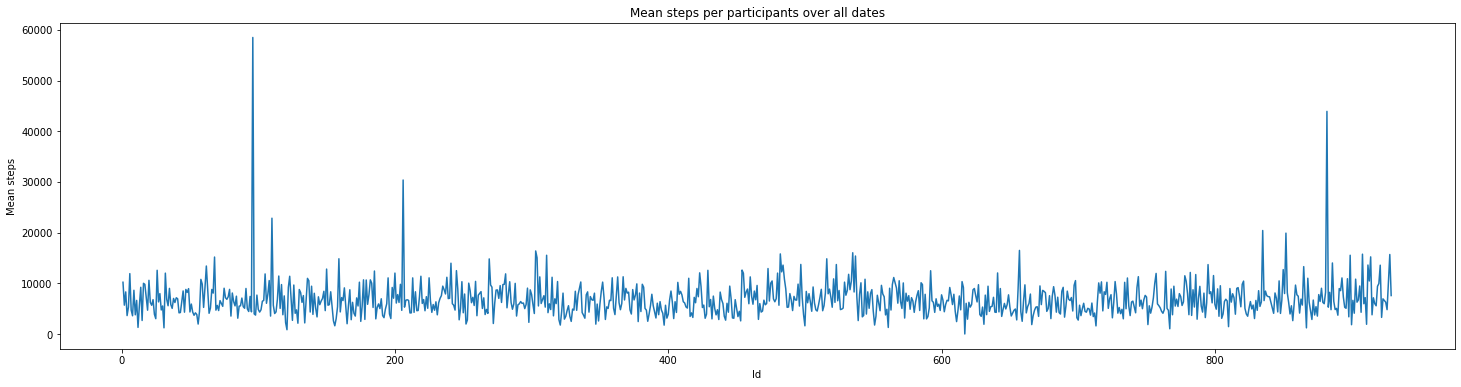

In [57]:
plt.figure(figsize=(25, 6))  
plot = sns.lineplot(x=df_new.id, y=df_new.mean_steps) #create the plot
 
plt.title("Mean steps per participants over all dates") #set the title
plt.xlabel("Id") #set the x-label
plt.ylabel("Mean steps") #set the y-label

plt.show() #show the plot

In [58]:
#The relation of meansteps per participant with at least 2 other quantitative variables  
df_subset = df_new[['height','weight','mean_steps']]
df_subset.head()

,height,weight,mean_steps
0,178.0,98.0,10205.521212
1,180.0,77.0,5687.423313
2,180.0,83.0,8301.729730
3,178.0,80.0,3633.200000
4,167.0,61.0,5312.129630


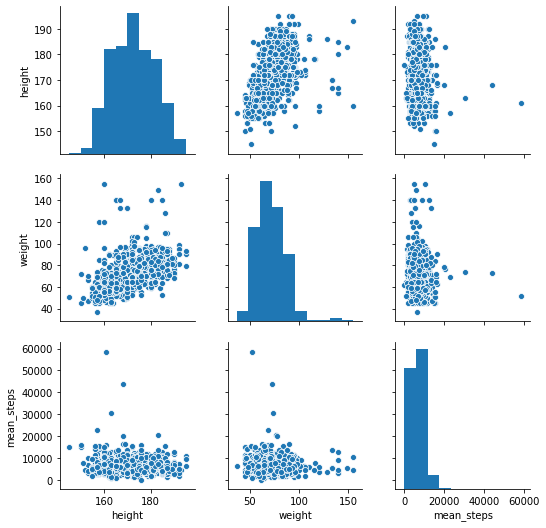

In [59]:
sns.pairplot(df_subset)
plt.show() 

In [60]:
from scipy.stats.stats import pearsonr 
print(pearsonr(df_new['mean_steps'],df_new['weight']))
print(pearsonr(df_new['mean_steps'],df_new['height']))

(-0.06843339589080613, 0.03816894710761986)
(-0.09035480719937922, 0.006153428450897307)


Participants' weight with mean steps:  
Weight: r which is -0.07, and p which appears to be 0.038.

Participants' height with mean steps:  
Height: r which is -0.09, and p which appears to be 0.006.

We can conclude the following:
Weight and Mean steps are more correlated (r = -0.07) 
Their correlation is not very significant (p = 0.038)
 

In [61]:
#The relation of mean steps per participant with a qualitative variable with two levels   
df_subset = df_new[['gender', 'mean_steps']]
df_subset.head()

,gender,mean_steps
0,Male,10205.521212
1,Male,5687.423313
2,Male,8301.729730
3,Male,3633.200000
4,Female,5312.129630


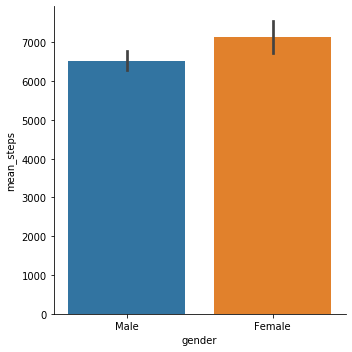

In [62]:
sns.catplot(x="gender", y="mean_steps", kind="bar", data=df_subset)

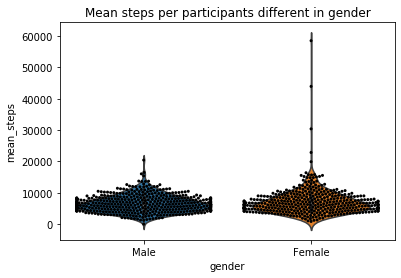

In [71]:
sns.violinplot(x=df_subset.gender, y=df_subset.mean_steps)
plt.title('Mean steps per participants different in gender') 
sns.swarmplot(x="gender", y="mean_steps", color="k", size=3, data=df_subset)
plt.show()

In [64]:
mean_steps_male = df_new.loc[df_new['gender'] == 'Male']
mean_steps_female = df_new.loc[df_new['gender'] == 'Female']
 
median_mean_steps_male = mean_steps_male['mean_steps'].median() 
median_mean_steps_female = mean_steps_female['mean_steps'].median() 
print(f'The median of Male mean steps is: {median_mean_steps_male}')  
print(f'The median of Famale mean steps is: {median_mean_steps_female}')  

The median of Male mean steps is: 6233.628571428571
The median of Famale mean steps is: 6285.386597938144


The difference of mean steps between male and female is small, just 52 steps. 

The significate differece on bar plot is caused by outliers. 

In [65]:
pd.crosstab(df["gender"], df["education_1"])

education_1,Bachelor,High school,Master or doctorate,No degree,Primary,Vocational
gender,,,,,,
Female,185,63,158,0,7,21
Male,172,43,253,1,6,19


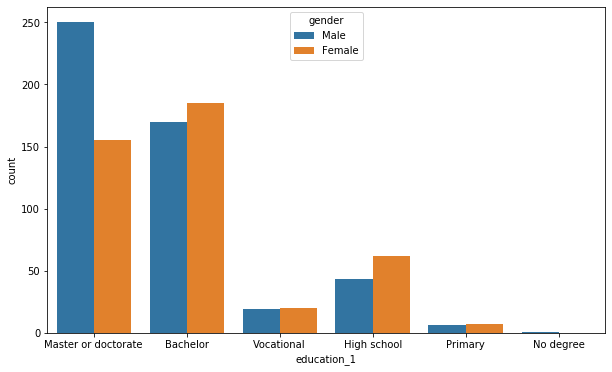

In [66]:
plt.figure(figsize=(10, 6))  # adjust the fig size to avoid overlap of education details
sns.countplot(x="education_1", hue="gender", data=df_new)
plt.show()

In [67]:
pd.crosstab(df["gender"], df["education_1"], normalize="columns")

education_1,Bachelor,High school,Master or doctorate,No degree,Primary,Vocational
gender,,,,,,
Female,0.518207,0.59434,0.384428,0.0,0.538462,0.525
Male,0.481793,0.40566,0.615572,1.0,0.461538,0.475


Conclution： 
According to the data of these 918 participants, more male than female are highly educated (master or doctorate).
But for other academic levels (bachelor/vocational/high school and primary), number of female are larger than male.
